Simulated Annealing
=======

# Theory

## Definition


## Examples


# Implementation


## Imports

In [580]:
import numpy as np
import sympy as sp
import pandas as pd
from sympy.abc import x
from typing import Callable
import matplotlib.pyplot as plt

In [581]:
domain = [-2,3]
x_0 = 2.5                                    # method starting value
gamma = 0.75                                 # step size
cost_func = lambda x : (x-4)**2              # use sp. methods only "i.e sp.cos()"
cooling_schedule = lambda t : -t + 300   # temperature decay function

## Algorithm


In [582]:
def SA(cost_func: Callable, x_0: float, cooling_schedule: Callable, time: int = int(1e5), task: str = "minimization") -> tuple[float, list, int]:
    '''
    _summary_

    Args:
        cost_func: _description_
        x_0: _description_
        cooling_schedule: _description_
        time: _description_. Defaults to int(1e5).
        task: _description_. Defaults to "minimization".

    Returns:
        _description_
    '''
    
    # if task is "minimization"

    x = [x_0]
    cost = [cost_func(x_0)]

    T = np.array([1e-16 if cooling_schedule(t) < 1e-16 else cooling_schedule(t) for t in range(time)])

    for i in range(time-1):
        
        x_neighbor = x[-1]+np.random.uniform(-2,2)
        delta_cost = cost_func(x_neighbor) - cost_func(x[-1])

        if delta_cost <= 0:
            x.append(x_neighbor)
            cost.append(cost_func(x_neighbor))

        else:
            accept = np.exp(-delta_cost/T[i]) > np.random.uniform(0,1)    
            if accept:
                x.append(x_neighbor)
                cost.append(cost_func(x_neighbor))
        


    return cost, x, T

## Results Visualization & Basic Convergence Analysis


In [583]:
cost, x, t = SA(cost_func=cost_func, x_0=60, cooling_schedule=cooling_schedule, time=1000)

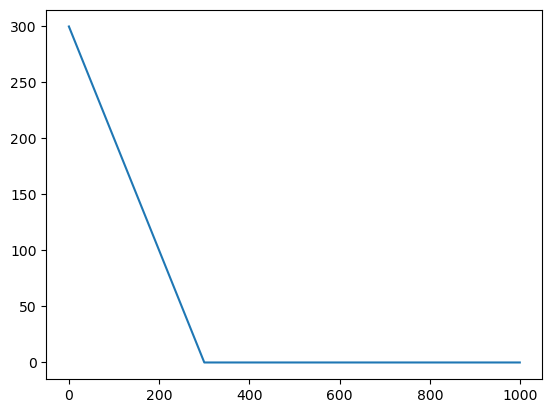

In [584]:
plt.plot(range(len(t)), t)

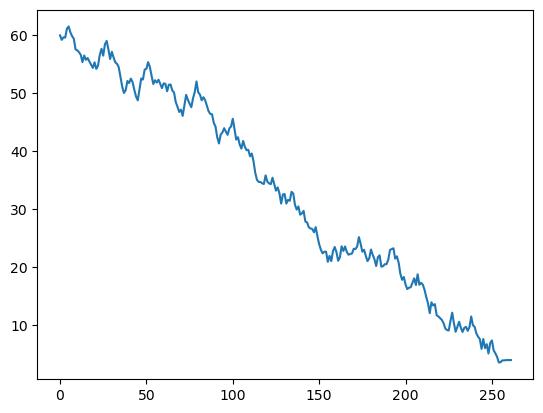

In [585]:
plt.plot(range(len(x)), x)

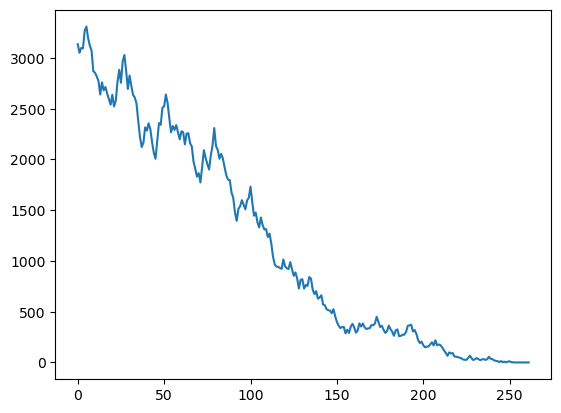

In [586]:
plt.plot(range(len(cost)), cost)